In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
pd.options.display.max_columns = 100

In [2]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

## Load Dataset

In [2]:
train = pd.read_csv("C:/Users/User/Downloads/data/bike/train.csv", parse_dates = ['datetime'])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv("C:/Users/User/Downloads/data/bike/test.csv", parse_dates = ['datetime'])
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Find null

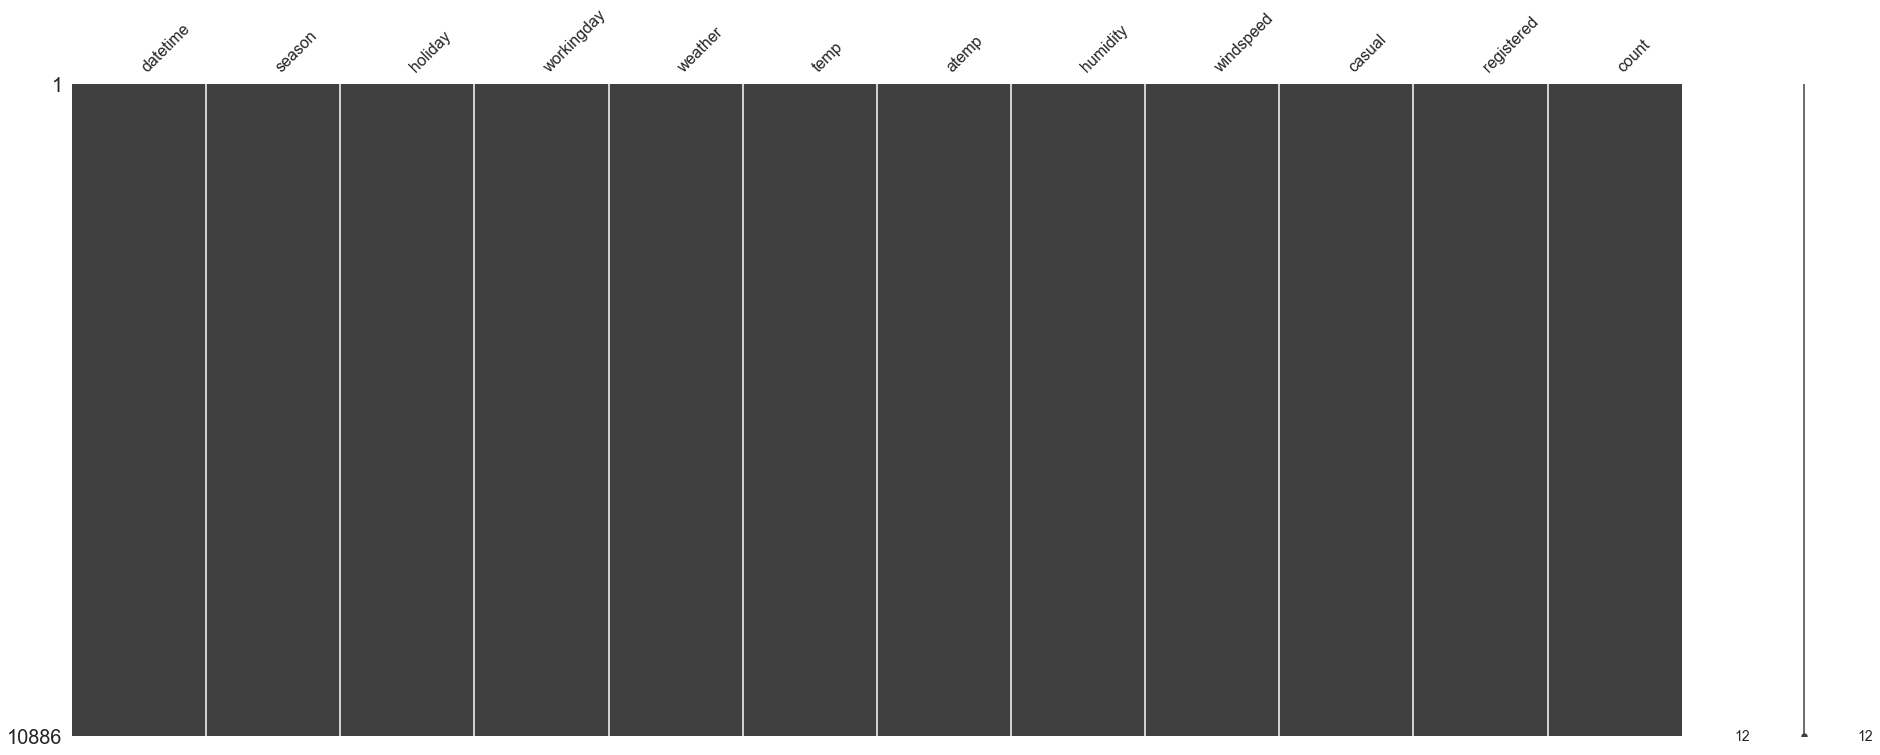

In [5]:
msno.matrix(train, figsize = (32,12))

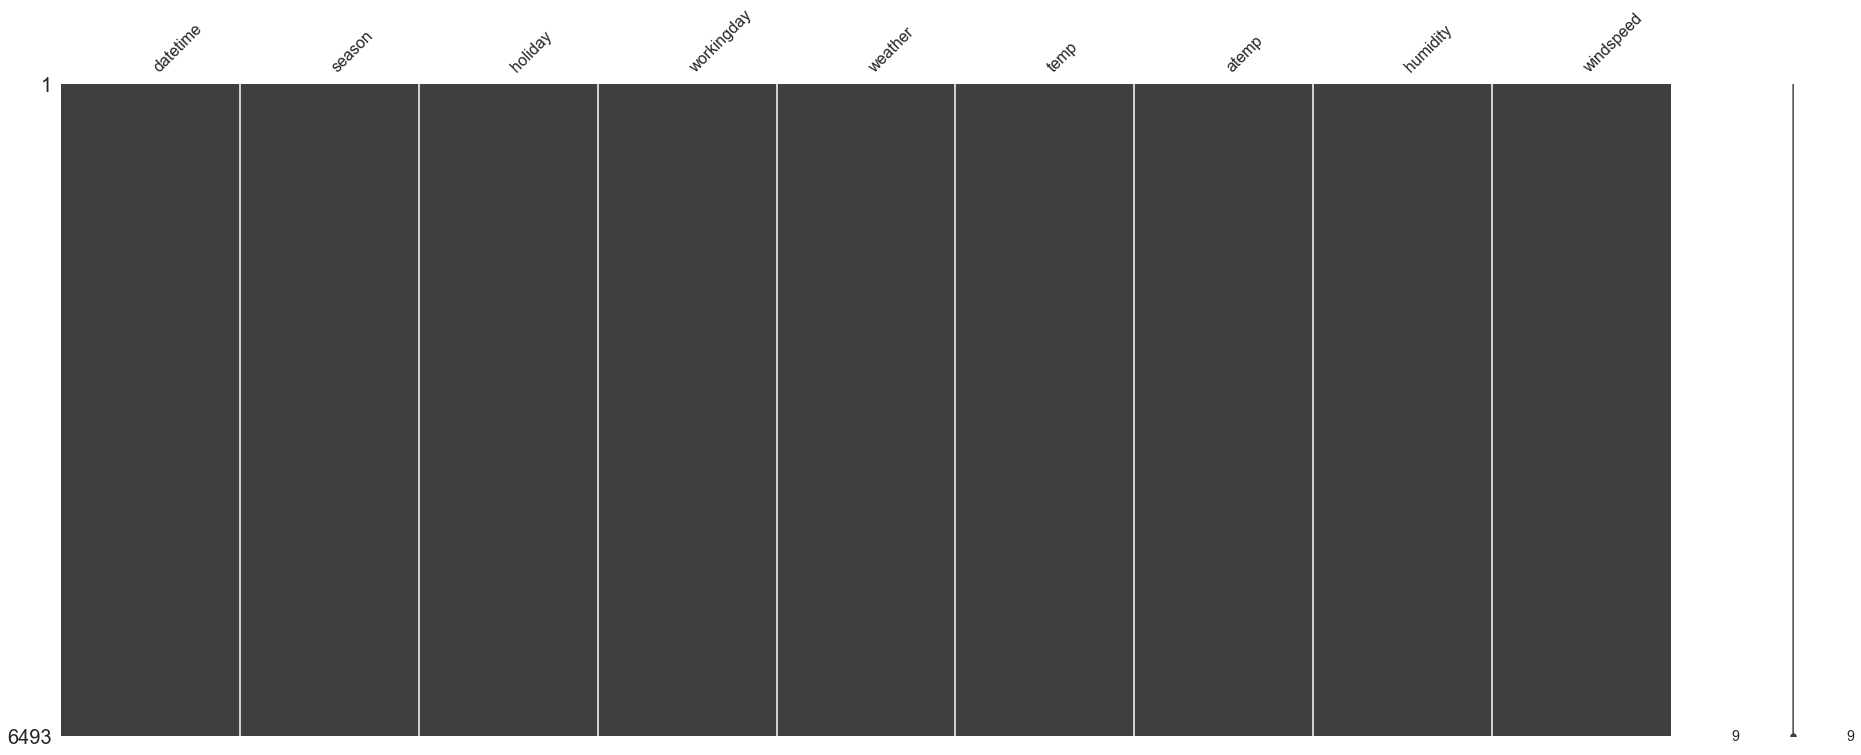

In [6]:
msno.matrix(test, figsize = (32,12))

## Explore

#### 1. Datetime

In [7]:
train['datetime_year'] = train['datetime'].dt.year
train['datetime_month'] = train['datetime'].dt.month
train['datetime_day'] = train['datetime'].dt.day
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_dayofweek'] = train['datetime'].dt.dayofweek

print(train.shape)
train[['datetime', 'datetime_year','datetime_month','datetime_day','datetime_hour','datetime_dayofweek']].head()

(10886, 17)


,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5


In [8]:
test['datetime_year'] = test['datetime'].dt.year
test['datetime_month'] = test['datetime'].dt.month
test['datetime_day'] = test['datetime'].dt.day
test['datetime_hour'] = test['datetime'].dt.hour
test['datetime_dayofweek'] = test['datetime'].dt.dayofweek

print(test.shape)
test[['datetime', 'datetime_year','datetime_month','datetime_day','datetime_hour','datetime_dayofweek']].head()

(6493, 14)


,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,3
1,2011-01-20 01:00:00,2011,1,20,1,3
2,2011-01-20 02:00:00,2011,1,20,2,3
3,2011-01-20 03:00:00,2011,1,20,3,3
4,2011-01-20 04:00:00,2011,1,20,4,3


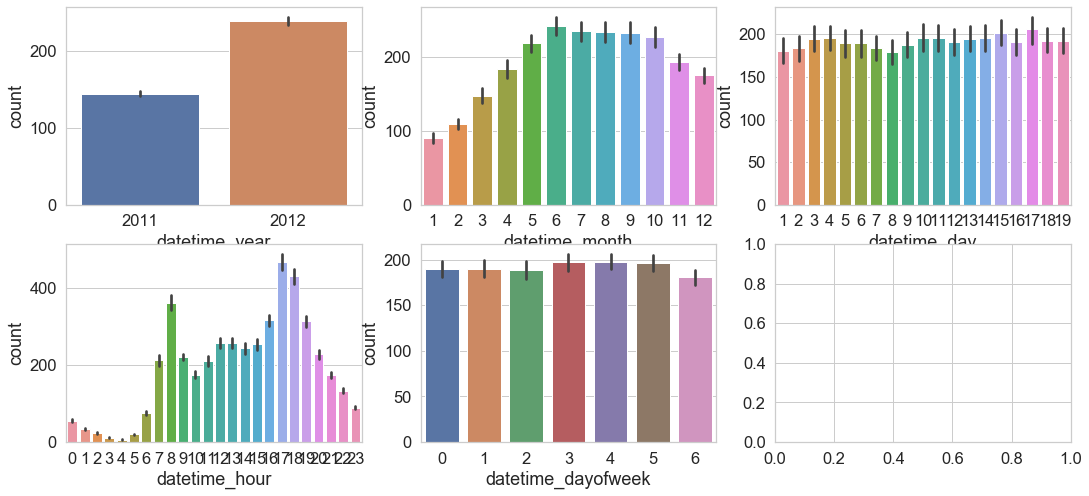

In [9]:
figure, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,8)

sns.barplot(data = train, x = 'datetime_year', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'datetime_month', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'datetime_day', y = 'count', ax = ax3)
sns.barplot(data = train, x = 'datetime_hour', y = 'count', ax = ax4)
sns.barplot(data = train, x = 'datetime_dayofweek', y = 'count', ax = ax5)


In [10]:
train['datetime_year_str'] = train['datetime_year'].astype('str')
train['datetime_month_str'] = train['datetime_month'].astype('str')
train['datetime_year_month'] = train['datetime_year_str'] + '-' + train['datetime_month_str']
print(train.shape)
train[['datetime_year_str', 'datetime_month_str', 'datetime_year_month']].head()

(10886, 20)


,datetime_year_str,datetime_month_str,datetime_year_month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


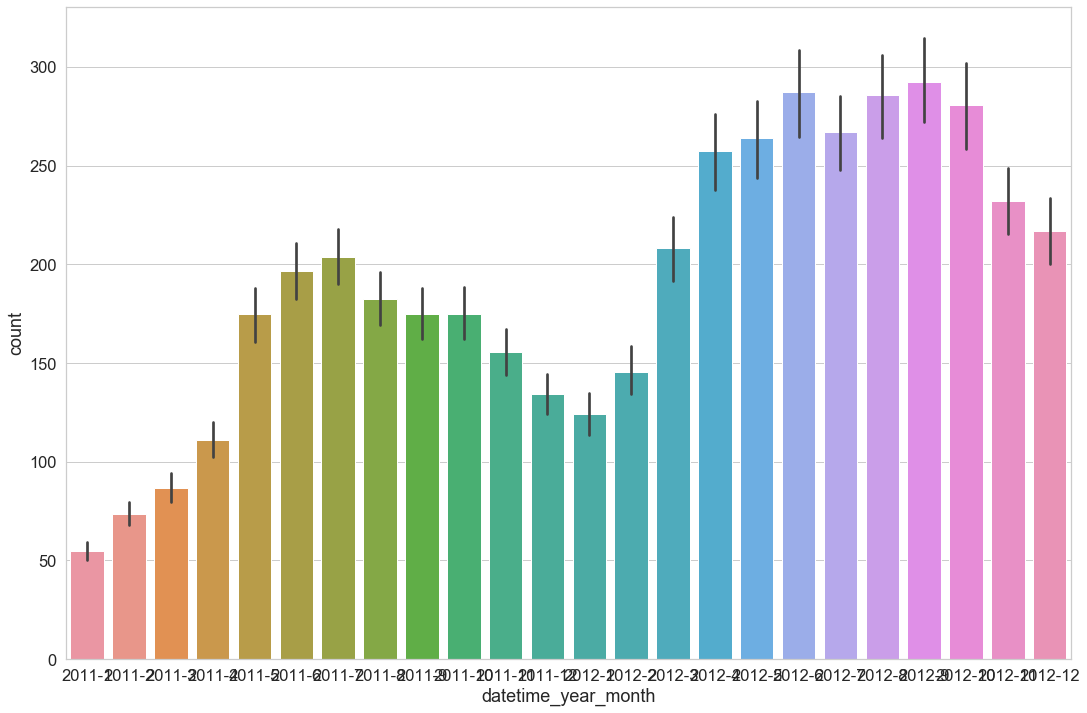

In [11]:
figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18,12)
sns.barplot(data = train, x = 'datetime_year_month', y = 'count' )

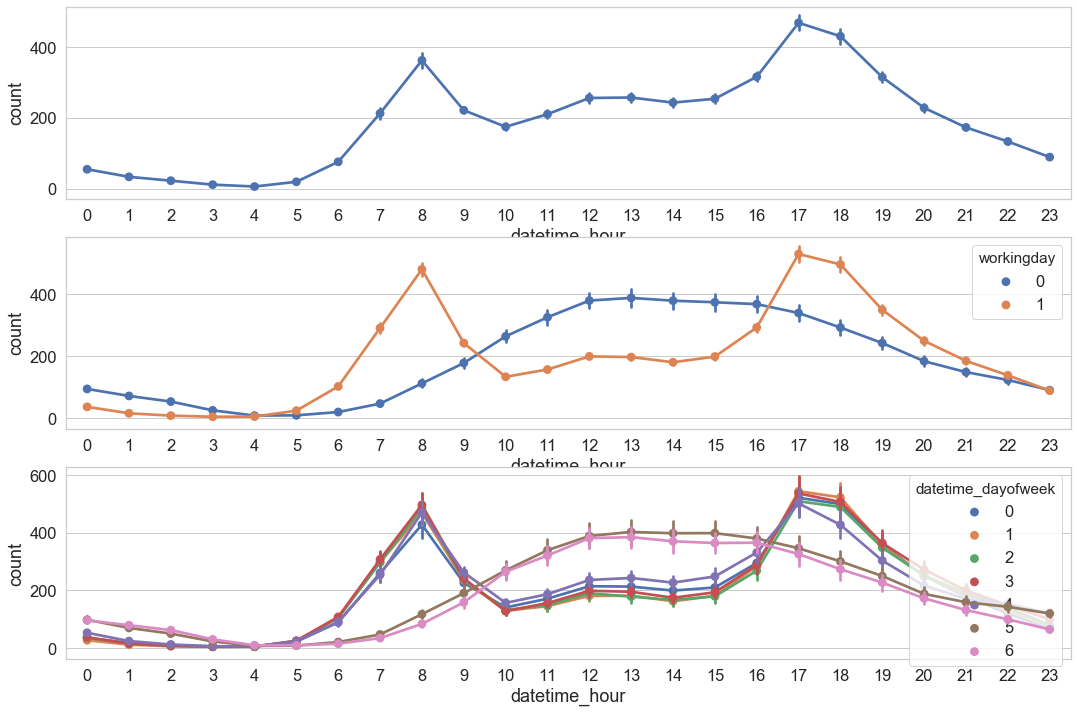

In [12]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1)
figure.set_size_inches(18,12)

sns.pointplot(data = train, x = 'datetime_hour', y = 'count', ax = ax1 )
sns.pointplot(data = train, x = 'datetime_hour', y = 'count', hue = 'workingday', ax = ax2 )
sns.pointplot(data = train, x = 'datetime_hour', y = 'count', hue = 'datetime_dayofweek', ax = ax3)

#### 2. count

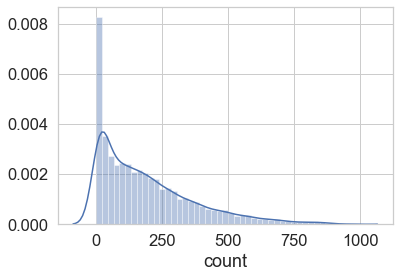

In [13]:
sns.distplot(train['count'])

In [14]:
train["log_count"] = np.log(train["count"]+1)
print(train.shape)
train[["count", "log_count"]].head()

(10886, 21)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


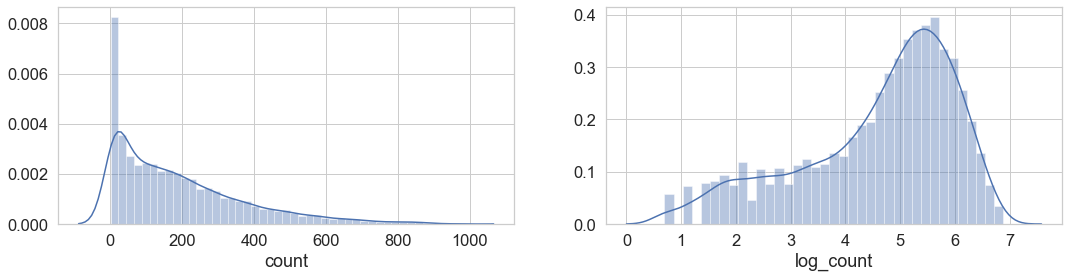

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)

In [16]:
train["count(recover)"] = np.exp(train["log_count"]) - 1
print(train.shape)

train[["count", "log_count", "count(recover)"]].head()

(10886, 22)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


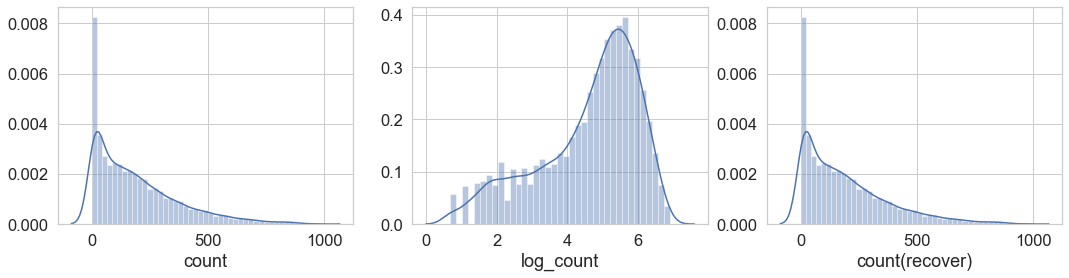

In [17]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(18, 4)


sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)
sns.distplot(train["count(recover)"], ax=ax3)

In [18]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime_year", "datetime_hour", "datetime_dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime_year',
 'datetime_hour',
 'datetime_dayofweek']

In [19]:
label_name = "log_count"
label_name

'log_count'

In [20]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_hour,datetime_dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [21]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_hour,datetime_dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [22]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

## Evaluate

In [23]:
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    
    square_distance = distance **2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

## Hyperparameter tuning

In [24]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
best_max_depth = 83
best_max_features = 0.851358
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
                      max_features=0.851358, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

## Fit

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
                      max_features=0.851358, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

## Predict

In [27]:
log_predictions = model.predict(X_test)
print(log_predictions.shape)

log_predictions

(6493,)


array([2.51395338, 1.73432803, 1.41821512, ..., 4.59957903, 4.58894783,
       3.87214013])

In [28]:
predictions = np.exp(log_predictions) - 1
print(predictions.shape)
predictions

(6493,)


array([11.35367239,  4.66511975,  3.12974278, ..., 98.44244437,
       97.39085218, 47.04509898])

## Submit

In [29]:
submission = pd.read_csv("C:/Users/User/Downloads/data/bike/sampleSubmission.csv")

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [30]:
submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.353672
1,2011-01-20 01:00:00,4.665120
2,2011-01-20 02:00:00,3.129743
3,2011-01-20 03:00:00,3.274112
4,2011-01-20 04:00:00,2.688771


In [31]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("C:/Users/User/Downloads/data/bike/random-forest_0.39138.csv", index = False)